# Multi-Qubit System in Quantum Computing Part -1( 2-Qubit Gates)
Previously We studied single qubit  gates. now this notebook demonstrate implementation of 2-Qubit system.In this notebook we studied following 2-qubit gates:
- CNOT Gate 
- SWAP /iSWAP gate
- CZ gate
- Controlled rotations(CRX,CRY,CRZ)
- Controlled H-Gate 
- Controlled Phase gate(CP gate)
- Custom Unitary 2-Qubit Unitary gate

All simulates using **Qiskit Statevector**

## 1. Import Qiskit Libraries
let's start with first importing required libararies.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector,Operator
from qiskit.visualization import plot_state_qsphere,plot_bloch_multivector
import numpy as np

## 2.Helper Function to Print Statevector
let's create state vector function to print statevector state.

In [4]:
def show_state(qc):
    sv=Statevector.from_instruction(qc)
    print(sv)
    return sv

## 3. Prepare Basic States
We will use some states for testing gates

In [5]:
# |10> 
qc_10 =QuantumCircuit(2)
qc_10.x(1)
show_state(qc_10)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


## 4. Standerd Two-Qubit Gates

### 4.1 CNOT Gate
Flips the target qubit if the control qubit is in state |1> ,creating Entanglement

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


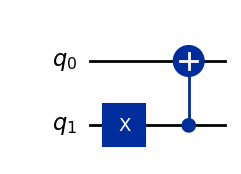

In [10]:
qc= QuantumCircuit(2)
qc.x(1) # prepare |10>
qc.cx(1,0) # apply CNOT
sv_cnot=show_state(qc)
qc.draw('mpl')

### 4.2 SWAP Gate
SWAP gate is used to Exchange the quantum state of two Qubit.

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


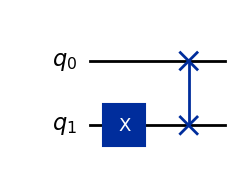

In [9]:
qc= QuantumCircuit(2)
qc.x(1)
qc.swap(0,1)
sv_swap=show_state(qc)
qc.draw('mpl')

### 4.3 iSWAP Gate
iSWAP Gate is used to Swpas two qubits and adds phase if i to the swapped amplitude.

Statevector([0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


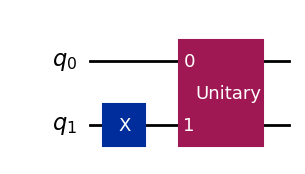

In [11]:
# iSWAP matrix
iswap_matrix = np.array([
                         [1,0,0,0],
                         [0,0,1j,0],
                         [0,1j,0,0],
                         [0,0,0,1]])
iswap =Operator(iswap_matrix)
qc=QuantumCircuit(2)
qc.x(1)
qc.append(iswap,[0,1])
sv_iswap= show_state(qc)
qc.draw('mpl')

### 5. Controlled Z-Gate
Controlled Z-Gate used to applies a Z(phase flip) only when both qubit are in state |1>.

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))


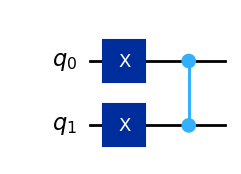

In [12]:
qc=QuantumCircuit(2)
qc.x(0)
qc.x(1) # Prepare |11>
qc.cz(1,0)
sv_cz=show_state(qc)
qc.draw('mpl')

### 6. Controlled Rotation Gates
#### 6.1 Controlled Rx-Gate(CRX Gate):
Controlled Rx-Gate is used to Applies and Rx rotation to the target Qubit when control qubit is |1>.

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2, 2))


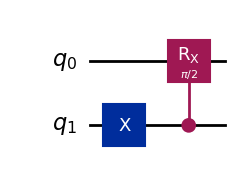

In [13]:
qc= QuantumCircuit(2)
qc.x(1) #control =1
qc.crx(np.pi/2,1,0)
sv_crx=show_state(qc)
qc.draw('mpl')

#### 6.2 Controlled Ry-Gate(CRY Gate):
Controlled Ry-Gate is used to Applies and Ry rotation to the target Qubit when control qubit is |1>.

Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


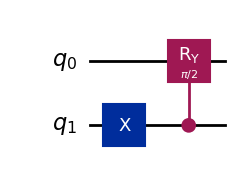

In [14]:
qc= QuantumCircuit(2)
qc.x(1) #control =1
qc.cry(np.pi/2,1,0)
sv_cry=show_state(qc)
qc.draw('mpl')

#### 6.3 Controlled Rz_Gate(CRZ Gate):
Controlled Rz-Gate is used to Applies and RZ rotation to the target Qubit when control qubit is |1>.

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.70710678-0.70710678j, 0.        +0.j        ],
            dims=(2, 2))


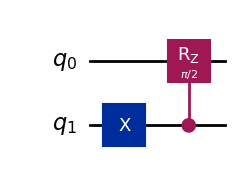

In [15]:
qc= QuantumCircuit(2)
qc.x(1) #control =1
qc.crz(np.pi/2,1,0)
sv_crz=show_state(qc)
qc.draw('mpl')

### 7. Controlled H-Gate
Controlled H-Gate is used to Applies and hadamard gate control qubit is |1>.

Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


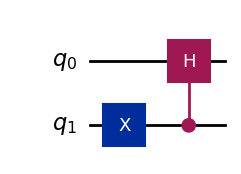

In [16]:
qc= QuantumCircuit(2)
qc.x(1) #control =1
qc.ch(1,0)
sv_ch=show_state(qc)
qc.draw('mpl')

### 8.Controlled Phase Gate(CP Gate)
Applies phase shift of $ e^{i\theta} $ to the |11> State.

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


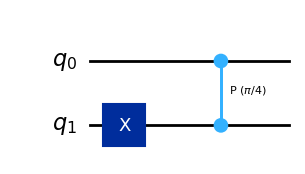

In [17]:
qc= QuantumCircuit(2)
qc.x(1) 
qc.cp(np.pi/4,1,0)
sv_cp=show_state(qc)
qc.draw('mpl')

### 9. Custom 2_Qubit Unitary Gate
User-Defined Unitary Gate acting on two qubits with arbitary transformation.
Example : Random 4*4 Unitary 


Statevector([ 0.22247608+0.09115843j, -0.42522271+0.66755423j,
              0.19142178-0.50138701j,  0.08619285+0.14244682j],
            dims=(2, 2))


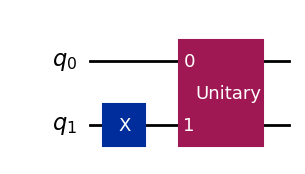

In [22]:
# Create random unitary 
from qiskit.quantum_info import random_unitary
#rand_unitary = Operator(np.random.rand(4,4) + 1j*np.random.rand(4,4))
rand_unitary=random_unitary(4)
qc= QuantumCircuit(2)
qc.x(1) 
qc.append(rand_unitary,[0,1])
sv_custom=show_state(qc)
qc.draw('mpl')

### 10. visualize any gate's final Statevector
for visualization we used bloch vector forthis last custom gate.

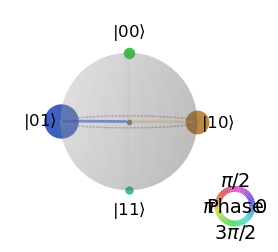

In [25]:
plot_state_qsphere(sv_custom,figsize=(4,3))

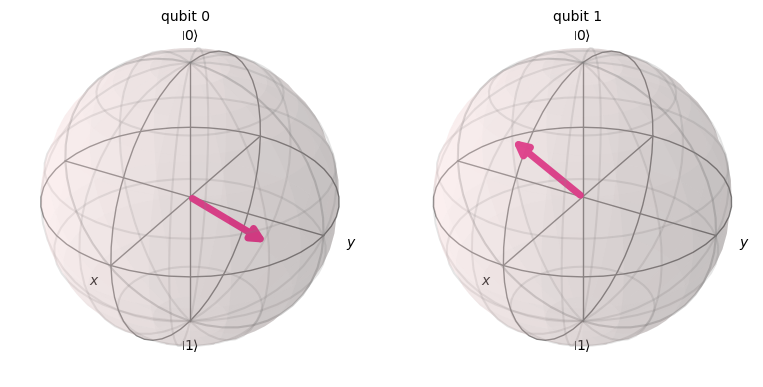

In [26]:
plot_bloch_multivector(sv_custom,figsize=(4,4))

in this notebook we understand working of 2-Qubit Gate in quantum computing and its statevector representation . this is necesssary for next section (part-2) to cretae 3-Qubit State and Buliding Quantum algorithm.for detail description of each refer notes **day7_notes.md**

---

**Author:** *Shreya Palase*  

**Date Created:**  *1-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day7_Multi2Qubit.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>